# Importing important libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import io

from google.colab import files
uploaded = files.upload()

Saving Classified Data to Classified Data


# reading 'Classified Data' file

In [5]:
df = pd.read_csv(io.StringIO(uploaded['Classified Data'].decode('utf-8')) , index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## checking for null values

In [6]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

## describing data

In [7]:
print(df.describe())
print('\n')
print(df.info())

               WTT          PTI  ...          NXJ  TARGET CLASS
count  1000.000000  1000.000000  ...  1000.000000    1000.00000
mean      0.949682     1.114303  ...     1.362725       0.50000
std       0.289635     0.257085  ...     0.204225       0.50025
min       0.174412     0.441398  ...     0.639693       0.00000
25%       0.742358     0.942071  ...     1.222623       0.00000
50%       0.940475     1.118486  ...     1.375368       0.50000
75%       1.163295     1.307904  ...     1.504832       1.00000
max       1.721779     1.833757  ...     1.893950       1.00000

[8 rows x 11 columns]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   

In [0]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('TARGET CLASS' , axis = 1))
scaled

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

# Splitting training and test data

In [0]:
X_train , X_test , y_train , y_test = train_test_split(scaled , df['TARGET CLASS'] , test_size = 0.2 , random_state= 0)

In [15]:
print('Training data size ')
print('Features : ' , X_train.shape)
print('Labels :' , y_train.shape)
print('\nTest data size')
print('Features :' , X_test.shape)
print('Labels :' , y_test.shape)

Training data size 
Features :  (800, 10)
Labels : (800,)

Test data size
Features : (200, 10)
Labels : (200,)


# **Elbow Method**

In [17]:
accuracy = []

for i in range(1,50):
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train ,y_train)
  yp_i = KNN.predict(X_test)
  accuracy.append(accuracy_score(y_test , yp_i))
print(accuracy)

[0.88, 0.87, 0.905, 0.905, 0.935, 0.935, 0.935, 0.925, 0.94, 0.94, 0.935, 0.935, 0.935, 0.93, 0.925, 0.925, 0.925, 0.93, 0.93, 0.925, 0.93, 0.93, 0.935, 0.93, 0.93, 0.93, 0.935, 0.93, 0.935, 0.93, 0.93, 0.925, 0.925, 0.925, 0.925, 0.925, 0.93, 0.935, 0.935, 0.93, 0.935, 0.935, 0.935, 0.935, 0.935, 0.94, 0.93, 0.93, 0.93]


In [20]:
error_rate = []
for i in range(1,50):
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train , y_train)
  yp_i = KNN.predict(X_test)
  error_rate.append(np.mean(yp_i != y_test))

print(error_rate)

[0.12, 0.13, 0.095, 0.095, 0.065, 0.065, 0.065, 0.075, 0.06, 0.06, 0.065, 0.065, 0.065, 0.07, 0.075, 0.075, 0.075, 0.07, 0.07, 0.075, 0.07, 0.07, 0.065, 0.07, 0.07, 0.07, 0.065, 0.07, 0.065, 0.07, 0.07, 0.075, 0.075, 0.075, 0.075, 0.075, 0.07, 0.065, 0.065, 0.07, 0.065, 0.065, 0.065, 0.065, 0.065, 0.06, 0.07, 0.07, 0.07]


## Plotting for accuracy

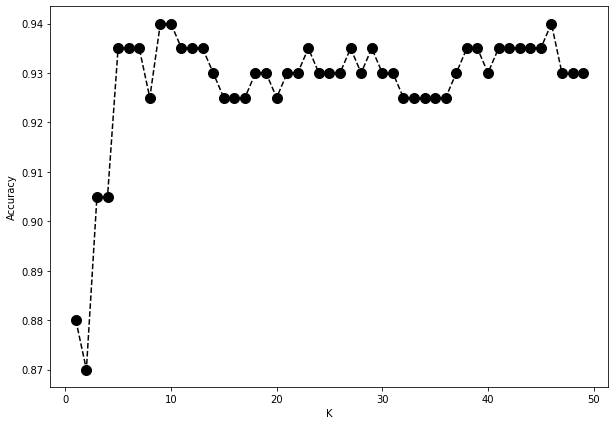

In [25]:
plt.figure(figsize=(10,7))
plt.plot(range(1,50) , accuracy , '--ok' , markersize = 10)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

## plotting for error rate 

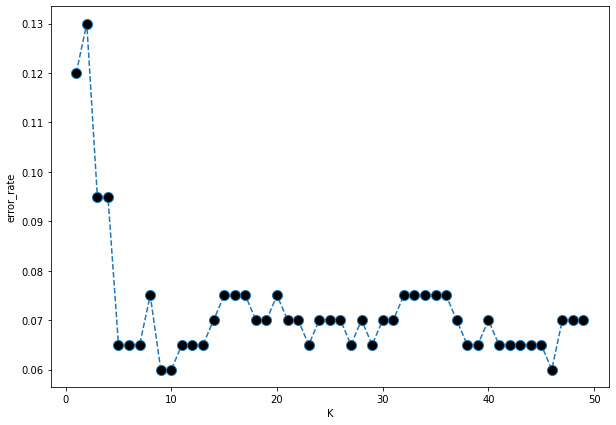

In [28]:
plt.figure(figsize=(10,7))
plt.plot(range(1,50) , error_rate , linestyle='dashed' ,marker = 'o',  markersize = 10 , markerfacecolor= 'k')
plt.xlabel('K')
plt.ylabel('error_rate')
plt.show()

In [30]:
model = KNeighborsClassifier(n_neighbors=9 ,metric = 'euclidean')
model.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [31]:
yp = model.predict(X_test)
yp

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1])

In [33]:
cm = confusion_matrix(y_test , yp)
print('Confusion Matrix')
print(cm)
print('\nClassification report')
print(classification_report(y_test , yp))

Confusion Matrix
[[ 79   7]
 [  5 109]]

Classification report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        86
           1       0.94      0.96      0.95       114

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [35]:
print('Training score' , model.score(X_train , y_train))
print('Test score' , model.score(X_test , y_test))
print('Validation score',accuracy_score(y_test , yp))

Training score 0.95
Test score 0.94
Validation score 0.94


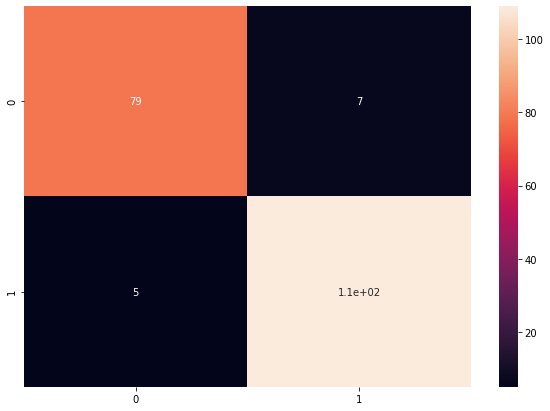

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(cm , annot=True )
